For this project I wanted to practice using a real world dataset to analyse time zone data, this can be useful for showing geographical trends enabling for businesses to locate specific geographical targets. This dataset was particularly useful because it also enabled me to practice data wrangling and practice pandas and seaborn for visualisation.


First I want to make sure I can read the file and that I can extract the JSON, (JavaScript Object Notation) into a Python dictionary.

In [1]:
path = "datasets/bitly_usagov/example.txt"
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [2]:
import json
with open(path) as f:
    records = [json.loads(line) for line in f]
    #records represents a list of Python dictionaries


Now let's first analyse the timezones that appear in the dataset. But first important to determine what direct dictionary represents the timezone from the dataset. Therefore must run records. As seen below, it is the tz field.

In [3]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

Since from the dataset, not all records have a time zone field, therefore important to add if to check. 
Large amounts of data so i will only show the first 10 time zones.

In [4]:
time_zones = [rec["tz"] for rec in records if "tz" in rec]

time_zones[:10]


['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

Since some of the timezones are unknown and represented by empty string, note to potentially remove these.

In [6]:
#Producing counts by timezone. Ie using a dictionary to store counts while iterating through the time zones.

def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts


counts = get_counts(time_zones)

counts["America/New_York"]

1251

However, this is just for America/New York. Let's now find the top 10 time zones and their counts. I do this by creating a list of tuples both by count and timezone and then sort it. Note: alternative is to use collections.Counter class

In [8]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [9]:
#Using Python standard library
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

Whilst this is interesting, I want to also be able to develop my Pandas practice, therefore one option for this is to create a dataFrame. I will use the original records.

In [12]:
import pandas as pd
frame = pd.DataFrame(records)

frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [13]:
#Counting using pandas
tz_counts = frame["tz"].value_counts()
tz_counts.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

I want to plot these results but need to now change the unknown values, so I will just give them a value of 'unknown' for the time being, since it is important to still have this data visible when analysing instead of just removing it entirely. 

In [14]:
clean_tz = frame["tz"].fillna("Missing")
clean_tz[clean_tz == ""] = "Unknown"
tz_counts = clean_tz.value_counts()
tz_counts.head()

tz
America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<Axes: ylabel='tz'>

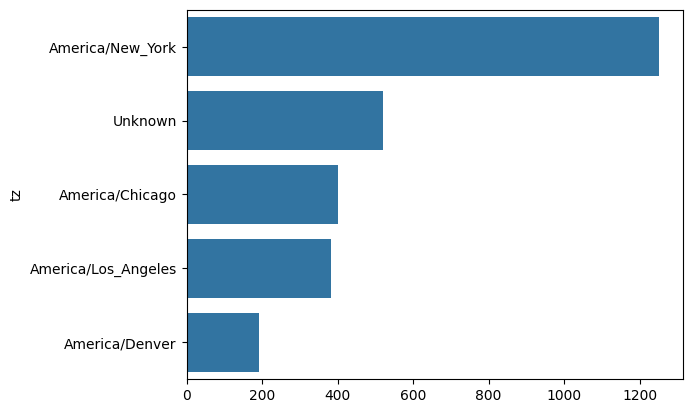

In [18]:
import seaborn as sns
subset = tz_counts.head()
sns.barplot(y=subset.index, x=subset.to_numpy())